In [1]:
""" Create global HWSD2 geotif files """
import rasterio as rio
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path_hwsd = os.path.join(os.environ['PROJDIR'], 'DATA', 'Soil_Properties', 'HWSD2')

In [2]:
# (1) Read map file
src  = rio.open(os.path.join(path_hwsd, 'HWSD2.bil'))
band1 = src.read(1)
print(dict(src.meta))

{'driver': 'EHdr', 'dtype': 'uint16', 'nodata': 65535.0, 'width': 43200, 'height': 21600, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]'), 'transform': Affine(0.00833333333333333, 0.0, -179.99999999999966,
       0.0, -0.00833333333333333, 89.99999999999996)}


In [3]:
# (2) Get lat & lon for the rectangular grid
width, height = src.width, src.height

lon = np.full(width, np.nan)
lat = np.full(height, np.nan)

for row in range(height):
    x, y = src.xy(row, 0)
    lat[row] = y

for col in range(width):
    x, y = src.xy(0, col)
    lon[col] = x

print(lat)
print(lon)

[ 89.99583333  89.9875      89.97916667 ... -89.97916667 -89.9875
 -89.99583333]
[-179.99583333 -179.9875     -179.97916667 ...  179.97916667  179.9875
  179.99583333]


In [7]:
# The map unit keys, excluding no data
mu_list = list(np.unique(band1.reshape(-1)))
mu_list.remove(65535)
print(mu_list)

[3040, 3070, 3118, 3147, 3154, 3215, 3221, 3295, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3454, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 349

In [8]:
# (4) Obtain soil property values from the MS Access Database
# save the HWSD2_LAYERS table from .mdb file to .csv for easier reading
soildata = pd.read_csv(os.path.join(path_hwsd, 'HWSD2_LAYERS.csv'))

<ipython-input-8-ddf4ca86f71c>:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  soildata = pd.read_csv(os.path.join(path_hwsd, 'HWSD2_LAYERS.csv'))


In [9]:
soildata.columns

Index(['ID', 'HWSD2_SMU_ID', 'NSC_MU_SOURCE1', 'NSC_MU_SOURCE2',
       'WISE30s_SMU_ID', 'HWSD1_SMU_ID', 'COVERAGE', 'SEQUENCE', 'SHARE',
       'NSC', 'WRB_PHASES', 'WRB4', 'WRB2', 'FAO90', 'ROOT_DEPTH', 'PHASE1',
       'PHASE2', 'ROOTS', 'IL', 'SWR', 'DRAINAGE', 'AWC', 'ADD_PROP', 'LAYER',
       'TOPDEP', 'BOTDEP', 'COARSE', 'SAND', 'SILT', 'CLAY', 'TEXTURE_USDA',
       'TEXTURE_SOTER', 'BULK', 'REF_BULK', 'ORG_CARBON', 'PH_WATER',
       'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT',
       'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM', 'ELEC_COND'],
      dtype='object')

In [10]:
# List the soil layer depth
layer_list = []
for layer in [f'D{i}' for i in range(1, 8)]:
    filt = soildata['LAYER'] == layer
    topdepth = soildata.loc[filt, 'TOPDEP'].iloc[0]
    botdepth = soildata.loc[filt, 'BOTDEP'].iloc[0]
    print(layer, topdepth, botdepth)
    layer_list.append(f'{topdepth}-{botdepth}cm')
print(layer_list)

D1 0 20
D2 20 40
D3 40 60
D4 60 80
D5 80 100
D6 100 150
D7 150 200
['0-20cm', '20-40cm', '40-60cm', '60-80cm', '80-100cm', '100-150cm', '150-200cm']


BULK D7


{'driver': 'EHdr', 'dtype': 'float32', 'nodata': 1e+20, 'width': 43200, 'height': 5400, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]'), 'transform': Affine(0.00833333333333333, 0.0, -179.99999999999966,
       0.0, -0.00833333333333333, 89.99999999999996), 'tiled': False}


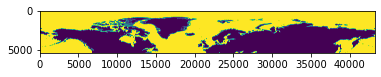

In [11]:
# for each variable and layer, save to file
#
# Relevant variables are
# 
# SAND      % weight    sand
# SILT      % weight    silt
# CLAY      % weight    clay
# ORG_CARBON    % weight    organic carbon content
# BULK      g/cm3       bulk density
# COARSE    % volume    coarse fragments
#
# No bedrock depth data

path_out = os.path.join(os.environ['PROJDIR'], 'Soil_Moisture_v2', 'intermediate',
                        'map_predictors', 'hwsd2')

for var in ['SAND', 'SILT', 'CLAY', 'BULK', 'ORG_CARBON', 'COARSE']:
    for layer in [f'D{i}' for i in range(1, 8)]:
        print(var, layer)

        band_temp = np.full(band1.shape, np.nan)
        for mu in mu_list:
            value = soildata.query('LAYER == @layer & HWSD2_SMU_ID == @mu')[var]
            share = soildata.query('LAYER == @layer & HWSD2_SMU_ID == @mu')['SHARE']
            value = np.sum(value.values * share.values) / 100.
            band_temp = np.where(band1 == mu, value, band_temp)
        band_temp = np.where(band1 == int(src.nodata), 1e20, band_temp)

        profile = dict(src.profile)
        profile['height'] = band_temp.shape[0]
        profile['dtype'] = np.float32
        profile['nodata'] = 1e20

        file_out = os.path.join(path_out, f'{var}_{layer}.tif')
        dst = rio.open(file_out, 'w', **profile)
        dst.write(band_temp, 1)
        dst.close()

        src2 = rio.open(file_out)
        band2 = src2.read(1)
        print(src2.profile)
        src2.close()
        plt.imshow(band2)

In [12]:
src.close()